## Neural Network for Fast Label free Nanoscale Composition discovery of Eukaryotic Cells

Code by: Marti Checa

Publication: M.Checa et. al "Fast Label-Free Nanoscale Composition Mapping of Eukaryotic Cells Via Scanning Dielectric Force Volume Microscopy and Machine Learning", Small Methods (2021)

## Imports

In [1]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.cluster import KMeans
import numpy as np
import time
import math
from sklearn.cluster import KMeans
from scipy import interpolate
from sklearn import decomposition
from scipy import ndimage
from sklearn import preprocessing
import os

## Loading the data and generating input images for the NN

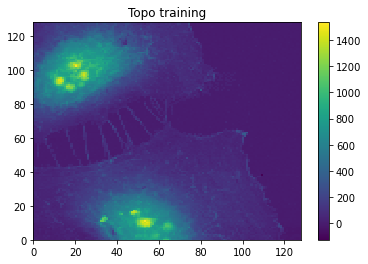

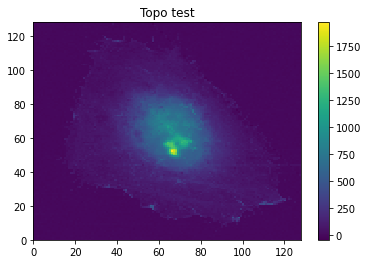

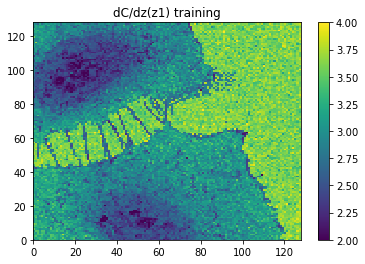

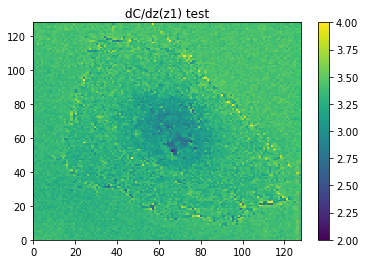

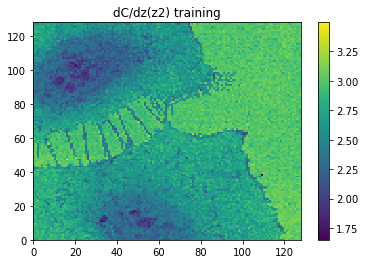

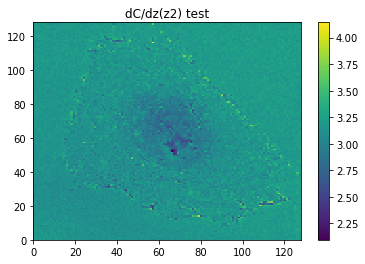

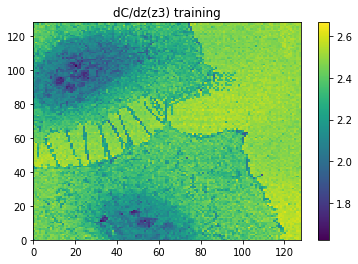

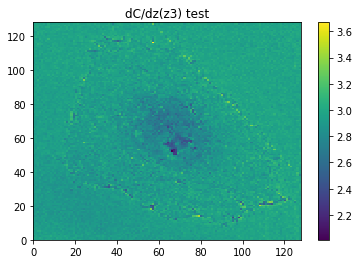

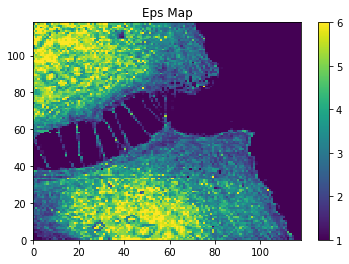

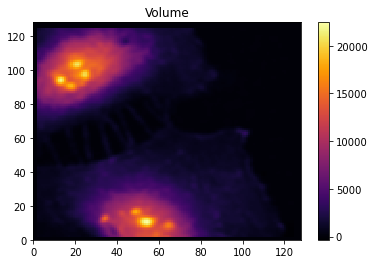

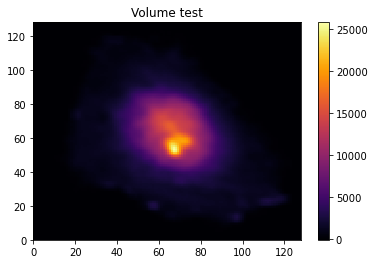

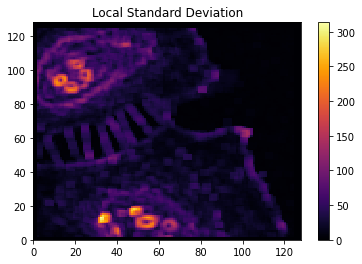

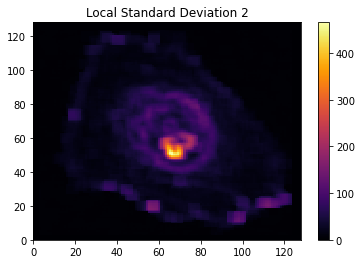

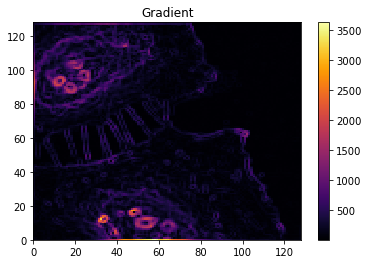

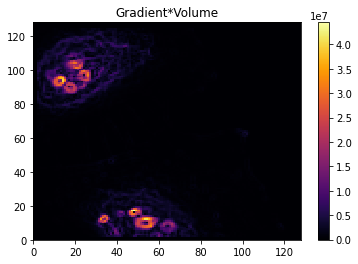

Loading the data: 0%
Loading the data: 0%
Loading the data: 0%
Loading the data: 0%
Loading the data: 0%
Loading the data: 0%
Loading the data: 0%
Loading the data: 1%
Loading the data: 2%
Loading the data: 3%
Loading the data: 6%
Loading the data: 12%
Loading the data: 25%
Loading the data: 50%


In [2]:
#Definition of Parameters
ImageSizeX=128
ImageSizeY=128
header_list_pillar = ["Z", "VDef", "R","Height_2","Precision 6","Series Time","Segment Time"]
header_list_Bacteria = ["Z", "VDef", "R","Height_2","LockinAmp","LockinPh","Precision 6","Precision 7", "Precision 8","Series Time","Segment Time"]
header_list_cell = ["Z", "VDef", "R","Height_2","LockinAmp","LockinPh","Precision 12","Precision 6","Precision 7", "Precision 8","Series Time","Segment Time"]
Number_of_pixels=ImageSizeX*ImageSizeY
Points_at_contact=4

#Pixels_for_volume_has to be an even number that resembles
Pixels_for_volume=4
Pixels_for_volume_2=6
Pixel_size=1
Pixel_size_2=0.71

#We read the file with the topo matrix and plot it
Path_topo = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\EFM9 Topography Flattened.txt' 
#Path_topo2 = r'C:\Users\Marti\Documents\Articulo Cells\EFM4 Topography Flattened.txt' 
Path_topo2 = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\Electrica6 Topography Flattened.txt'

topo=pd.read_table(Path_topo,header=None, sep='\t',skiprows=5)
topo=topo.values
f1=plt.figure()
plt.pcolormesh(topo)
plt.colorbar()
plt.title('Topo training')
plt.show()

topo_2=pd.read_table(Path_topo2,header=None, sep='\t',skiprows=5)
topo_2=topo_2.values
f1=plt.figure()
plt.pcolormesh(topo_2)
plt.colorbar()
plt.title('Topo test')
plt.show()

offset_electrico=4.5
#We read the C' images
Path_C1 = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\C_50_EFM9.txt' 
C1=pd.read_table(Path_C1,header=None, sep='\t',skiprows=5)
#Path_C1_2 = r'C:\Users\Marti\Documents\Articulo Cells\C_50_EFM4.txt' 
Path_C1_2 = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\C_50_Electrica6.txt' 
C1_2=pd.read_table(Path_C1_2,header=None, sep='\t',skiprows=5)

C1=C1.values
f1=plt.figure()
plt.pcolormesh(C1)
plt.colorbar()
plt.clim(2,4)
plt.title('dC/dz(z1) training')
plt.show()

C1_2=C1_2.values*offset_electrico
f1=plt.figure()
plt.pcolormesh(C1_2)
plt.title('dC/dz(z1) test')
plt.clim(2,4)
plt.colorbar()
plt.show()

Path_C2 = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\C_71_EFM9.txt' 
C2=pd.read_table(Path_C2,header=None, sep='\t',skiprows=5)
#Path_C2_2 = r'C:\Users\Marti\Documents\Articulo Cells\C_71_EFM4.txt' 
Path_C2_2 = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\C_71_Electrica6.txt' 
C2_2=pd.read_table(Path_C2_2,header=None, sep='\t',skiprows=5)

C2=C2.values
f1=plt.figure()
plt.pcolormesh(C2)
plt.colorbar()
plt.title('dC/dz(z2) training')
plt.show()

C2_2=C2_2.values*offset_electrico
f1=plt.figure()
plt.pcolormesh(C2_2)
plt.colorbar()
plt.title('dC/dz(z2) test')
plt.show()

Path_C3 = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\C_110_EFM9.txt' 
C3=pd.read_table(Path_C3,header=None, sep='\t',skiprows=5)
#Path_C3_2 = r'C:\Users\Marti\Documents\Articulo Cells\C_110_EFM4.txt'
Path_C3_2 = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\C_110_Electrica6.txt' 
C3_2=pd.read_table(Path_C3_2,header=None, sep='\t',skiprows=5)

C3=C3.values
f1=plt.figure()
plt.pcolormesh(C3)
plt.colorbar()
plt.title('dC/dz(z3) training')
plt.show()

C3_2=C3_2.values*offset_electrico
f1=plt.figure()
plt.pcolormesh(C3_2)
plt.title('dC/dz(z3) test')
plt.colorbar()
plt.show()

#Definition of Parameters EFM9
eps_ImageSizeX=118
eps_ImageSizeY=118
X_ini=5
X_fin=122
Y_ini=5
Y_fin=122
eps_Number_of_pixels=eps_ImageSizeX*eps_ImageSizeY
eps_map_vector=np.empty(eps_Number_of_pixels)

#We read the file with the EPSILON matrix
Path_eps = r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\EFM9 epsmap.txt' 
eps_map=pd.read_table(Path_eps,header=None, sep='\t',skiprows=5)
eps_map=eps_map.values
f1=plt.figure()
plt.pcolormesh(eps_map)
plt.colorbar()
plt.clim(1,6) 
plt.title('Eps Map')
plt.show()

#We define the function that calculates the area:
def double_Integral(xmin, xmax, ymin, ymax, nx, ny, A):
    dS = ((xmax-xmin)/(nx-1)) * ((ymax-ymin)/(ny-1))
    A_Internal = A[1:-1, 1:-1]
    # sides: up, down, left, right
    (A_u, A_d, A_l, A_r) = (A[0, 1:-1], A[-1, 1:-1], A[1:-1, 0], A[1:-1, -1])
    # corners
    (A_ul, A_ur, A_dl, A_dr) = (A[0, 0], A[0, -1], A[-1, 0], A[-1, -1])
    return dS * (np.sum(A_Internal)\
                + 0.5 * (np.sum(A_u) + np.sum(A_d) + np.sum(A_l) + np.sum(A_r))\
                + 0.25 * (A_ul + A_ur + A_dl + A_dr))

#We initialize the matrix with zeros and fill it with the volume probed:
V_probed=np.zeros((ImageSizeX,ImageSizeY))
std_probed=np.zeros((ImageSizeX,ImageSizeY))
Topo_probed=np.zeros((Pixels_for_volume,Pixels_for_volume))

V_probed_2=np.zeros((ImageSizeX,ImageSizeY))
std_probed_2=np.zeros((ImageSizeX,ImageSizeY))
Topo_probed_2=np.zeros((Pixels_for_volume,Pixels_for_volume))

for i in range(int(Pixels_for_volume/2),(ImageSizeX-1-int(Pixels_for_volume/2))):
        for j in range(int(Pixels_for_volume/2),(ImageSizeX-1-int(Pixels_for_volume/2))):
            Topo_probed=topo[i-int(Pixels_for_volume/2):i+int(Pixels_for_volume/2),j-int(Pixels_for_volume/2):j+int(Pixels_for_volume/2)]
            V_probed[i,j]=double_Integral(0,Pixels_for_volume*Pixel_size,0,Pixels_for_volume*Pixel_size,Pixels_for_volume,Pixels_for_volume,Topo_probed)
            std_probed[i,j]=np.std(Topo_probed)
            
for i in range(int(Pixels_for_volume_2/2),(ImageSizeX-1-int(Pixels_for_volume_2/2))):
        for j in range(int(Pixels_for_volume_2/2),(ImageSizeX-1-int(Pixels_for_volume_2/2))):            
            Topo_probed_2=topo_2[i-int(Pixels_for_volume_2/2):i+int(Pixels_for_volume_2/2),j-int(Pixels_for_volume_2/2):j+int(Pixels_for_volume_2/2)]
            V_probed_2[i,j]=double_Integral(0,Pixels_for_volume_2*Pixel_size_2,0,Pixels_for_volume_2*Pixel_size_2,Pixels_for_volume_2,Pixels_for_volume_2,Topo_probed_2)
            std_probed_2[i,j]=np.std(Topo_probed_2)     

#We plot the Volume probed
f2=plt.figure()
plt.pcolormesh(V_probed,cmap='inferno')
plt.title('Volume')
plt.colorbar()
plt.show()    

f22=plt.figure()
plt.pcolormesh(V_probed_2,cmap='inferno')
plt.title('Volume test')
plt.colorbar()
plt.show()   

os.chdir(r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\Saves images')
np.savetxt("Volume training image.txt", V_probed , delimiter = ",")

#We plot the STD local 
f22=plt.figure()
plt.pcolormesh(std_probed,cmap='inferno')
plt.title('Local Standard Deviation')
plt.colorbar()
plt.show()   

f22=plt.figure()
plt.pcolormesh(std_probed_2,cmap='inferno')
plt.title('Local Standard Deviation 2')
plt.colorbar()
plt.show() 
#Now lets calculate the gradient of the image.

# Get x-gradient in "sx"
gradient_x = ndimage.sobel(topo,axis=0,mode='constant')
# Get y-gradient in "sy"
gradient_y = ndimage.sobel(topo,axis=1,mode='constant')
# Get square root of sum of squares
gradient=np.hypot(gradient_x,gradient_y)

#We plot the gradient
f3=plt.figure()
plt.pcolormesh(gradient,cmap='inferno')
plt.colorbar()
plt.title('Gradient')
#c
plt.show()    

#We plot the gradient*Volume Probed
f4=plt.figure()
plt.pcolormesh(np.multiply(gradient,V_probed),cmap='inferno')
plt.colorbar()
plt.title('Gradient*Volume')
#plt.clim(0,1.25e8) 
plt.show()   

topo_vector=np.empty(eps_Number_of_pixels)
gradient_vector=np.empty(eps_Number_of_pixels)
volume_vector=np.empty(eps_Number_of_pixels)
std_vector=np.empty(eps_Number_of_pixels)
eps_vector=np.empty(eps_Number_of_pixels)
C1_vector=np.empty(eps_Number_of_pixels)
C2_vector=np.empty(eps_Number_of_pixels)
C3_vector=np.empty(eps_Number_of_pixels)

#print(eps_vector.shape)
#print(eps_map.shape)

topo_vector_2=np.empty(Number_of_pixels)
gradient_vector_2=np.empty(Number_of_pixels)
volume_vector_2=np.empty(Number_of_pixels)
std_vector_2=np.empty(Number_of_pixels)
eps_vector_2=np.empty(Number_of_pixels)
C1_2vector=np.empty(Number_of_pixels)
C2_2vector=np.empty(Number_of_pixels)
C3_2vector=np.empty(Number_of_pixels)

contador=0
for i in range(0,(Number_of_pixels-1)):  
    if i>0:
        if Number_of_pixels % i == 0:
            print('Loading the data: '+str(round(100*i/Number_of_pixels))+'%')

    xid=math.trunc(i/ImageSizeX)
    yid=i-ImageSizeX*math.trunc(i/ImageSizeX)
  
#We fill the 1D vectors of the additional images
    
    if(xid >= X_ini and  xid <= X_fin and (ImageSizeY-1-yid)>=Y_ini and (ImageSizeY-1-yid)<=Y_fin):
        eps_vector[contador]=eps_map[xid-X_ini,ImageSizeY-1-yid-Y_ini]
        topo_vector[contador]=topo[xid,ImageSizeY-1-yid]
        gradient_vector[contador]=gradient[xid,ImageSizeY-1-yid]
        volume_vector[contador]=V_probed[xid,ImageSizeY-1-yid]
        std_vector[contador]=std_probed[xid,ImageSizeY-1-yid]
        C1_vector[contador]=C1[xid,ImageSizeY-1-yid]
        C2_vector[contador]=C2[xid,ImageSizeY-1-yid]
        C3_vector[contador]=C3[xid,ImageSizeY-1-yid]     
        
    #We fill the 1D vectors of the additional images for 2
        topo_vector_2[contador]=topo_2[xid,ImageSizeY-1-yid]
        volume_vector_2[contador]=V_probed_2[xid,ImageSizeY-1-yid]
        std_vector_2[contador]=std_probed_2[xid,ImageSizeY-1-yid] 
        C1_2vector[contador]=C1_2[xid,ImageSizeY-1-yid]
        C2_2vector[contador]=C2_2[xid,ImageSizeY-1-yid]
        C3_2vector[contador]=C3_2[xid,ImageSizeY-1-yid]  
        
        contador=contador+1

## Prepare the imported data for the NN

In [3]:
from sklearn.preprocessing import StandardScaler

eps_vector_nometal=eps_vector[(eps_vector>1)]
topo_vector_nometal=topo_vector[(eps_vector>1)]
volume_vector_nometal=volume_vector[(eps_vector>1)]
std_vector_nometal=std_vector[(eps_vector>1)]
gradient_vector_nometal=gradient_vector[(eps_vector>1)]
C1_nometal=C1_vector[(eps_vector>1)]
C2_nometal=C2_vector[(eps_vector>1)]
C3_nometal=C3_vector[(eps_vector>1)]

Number_of_pixels_nometal=len(eps_vector_nometal)

#We add all the data to the matrix to be classified
data_for_NN=np.column_stack((C1_vector,C2_vector,C3_vector,topo_vector,volume_vector,std_vector))
data_for_NN_nometal=np.column_stack((C1_nometal,C2_nometal,C3_nometal,topo_vector_nometal,volume_vector_nometal,std_vector_nometal))

scaler = StandardScaler()
scaler.fit(data_for_NN)
Normalized_Data = scaler.transform(data_for_NN)

scaler = StandardScaler()
scaler.fit(data_for_NN_nometal)
Normalized_Data_nometal = scaler.transform(data_for_NN_nometal)

#We now try to perform the same normalization to to the test image:
#first we find the mean and std:
meanC1=np.mean(C1_nometal)
stdC1=np.std(C1_nometal)
meanC2=np.mean(C2_nometal)
stdC2=np.std(C2_nometal)
meanC3=np.mean(C3_nometal)
stdC3=np.std(C3_nometal)
meantopo=np.mean(topo_vector_nometal)
stdtopo=np.std(topo_vector_nometal)
meanvolume=np.mean(volume_vector_nometal)
stdvolume=np.std(volume_vector_nometal)
meanstd=np.mean(std_vector_nometal)
stdstd=np.std(std_vector_nometal)

#then we create the vectors without normalization.
C1_2nometal=C1_2vector[(topo_vector_2>11)]
C2_2nometal=C2_2vector[(topo_vector_2>11)]
C3_2nometal=C3_2vector[(topo_vector_2>11)]
topo_vector_nometal_2=topo_vector_2[(topo_vector_2>11)]
volume_vector_nometal_2=volume_vector_2[(topo_vector_2>11)]
std_vector_nometal_2=std_vector_2[(topo_vector_2>11)]

#We add all the data to the matrix to be classified
data_for_NN_2=np.column_stack((C1_2vector,C2_2vector,C3_2vector,topo_vector_2,volume_vector_2,std_vector_2))
data_for_NN_nometal_2=np.column_stack((C1_2nometal,C2_2nometal,C3_2nometal,topo_vector_nometal_2,volume_vector_nometal_2,std_vector_nometal_2))

#We do the normalization by hand
C1_2nometal=((C1_2nometal-meanC1)/stdC1)
C2_2nometal=((C2_2nometal-meanC2)/stdC2)
C3_2nometal=((C3_2nometal-meanC3)/stdC3)
topo_vector_nometal_2=((topo_vector_nometal_2-meantopo)/stdtopo)
volume_vector_nometal_2=((volume_vector_nometal_2-meanvolume)/stdvolume)
std_vector_nometal_2=((std_vector_nometal_2-meanstd)/stdstd)

Normalized_Data_2 = np.column_stack((C1_2vector,C2_2vector,C3_2vector,topo_vector_2,volume_vector_2,std_vector_2))
Normalized_Data_nometal_2 = np.column_stack((C1_2nometal,C2_2nometal,C3_2nometal,topo_vector_nometal_2,volume_vector_nometal_2,std_vector_nometal_2))

#print(eps_vector_nometal)
#print(data_for_NN_nometal)
#print(data_for_NN_nometal_2)
print('Data ready for NN')

Data ready for NN


## Perform the Multy Layer Perceptron regressor

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
import os
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# We train the model
option=1

if option==0:
    regr = MLPRegressor(random_state=1, max_iter=2000).fit(data_for_NN_nometal, eps_vector_nometal)
    print(regr.score(data_for_NN_nometal, eps_vector_nometal))
elif option==1:
    regr = MLPRegressor(random_state=1, max_iter=2000).fit(Normalized_Data_nometal, eps_vector_nometal)
    print('The score of the trained MPL is:')
    print(regr.score(Normalized_Data_nometal, eps_vector_nometal))
elif option==2:
    regr = MLPRegressor(random_state=1, max_iter=2000).fit(data_for_NN, eps_vector)
    print(regr.score(data_for_NN, eps_vector))
elif option==3:
    regr = MLPRegressor(random_state=1, max_iter=2000).fit(Normalized_Data, eps_vector)
    print(regr.score(Normalized_Data, eps_vector))

The score of the trained MPL is:
0.9161704559721041


## Predict the new image (out-of-distribution test)

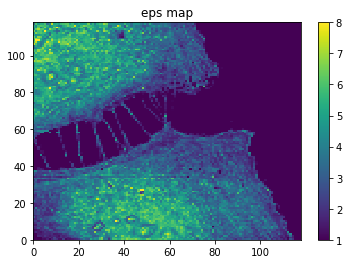

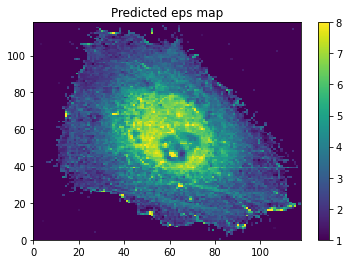

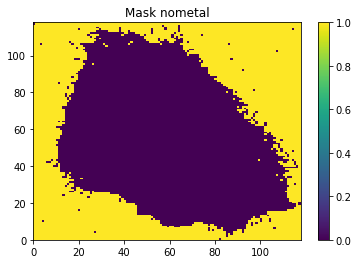

Wall time: 488 ms


In [5]:
%%time

#We predict the unknown data
if option==0:
    prediction=regr.predict(data_for_NN_nometal_2)
    predicted_eps_map=np.zeros(eps_Number_of_pixels)
    mask_nometal=np.zeros(eps_Number_of_pixels)
elif option==1:
    prediction=regr.predict(Normalized_Data_nometal_2)
    predicted_eps_map=np.zeros(eps_Number_of_pixels)
    mask_nometal=np.zeros(eps_Number_of_pixels)
elif option==2:
    prediction=regr.predict(data_for_NN_2)
    predicted_eps_map=np.zeros(eps_Number_of_pixels)
    mask_nometal=np.zeros(eps_Number_of_pixels)
elif option==3: 
    prediction=regr.predict(Normalized_Data_2)
    predicted_eps_map=np.zeros(eps_Number_of_pixels)
    mask_nometal=np.zeros(eps_Number_of_pixels)
    
# We classify the test data:
cont_metal=0
for i in range(0,(eps_Number_of_pixels-1)):
    
    if option<2:   
        if (topo_vector_2[i]>11):
            predicted_eps_map[i]=prediction[cont_metal]
            mask_nometal[i]=0
            cont_metal=cont_metal+1
        else:
            predicted_eps_map[i]=1
            mask_nometal[i]=1
    if option >1:
        predicted_eps_map[i]=prediction[i]
        mask_nometal[i]=0
        
predicted_eps_map = np.reshape(predicted_eps_map,(eps_ImageSizeX,eps_ImageSizeY))
predicted_eps_map = np.fliplr(predicted_eps_map)

mask_nometal = np.reshape(mask_nometal,(eps_ImageSizeX,eps_ImageSizeY))
mask_nometal = np.fliplr(mask_nometal)

f20=plt.figure()
plt.pcolormesh(eps_map)
plt.colorbar()
plt.title('eps map')
plt.clim(1,8) 
plt.show()  

f229=plt.figure()
plt.pcolormesh(predicted_eps_map)
plt.colorbar()
plt.title('Predicted eps map')
plt.clim(1,8) 
plt.show() 

f229=plt.figure()
plt.pcolormesh(mask_nometal)
plt.colorbar()
plt.title('Mask nometal')
plt.clim(0,1) 
plt.show() 

## Save generated maps

In [6]:
#We save the images if wanted

os.chdir(r'C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\Saves images')
np.savetxt("Prediction_Electrica6.txt",predicted_eps_map, delimiter = ",")